# Dual Autodifferentiation Tutorial

## Demonstration of the Dual Class

This notebook demonstrates the implementation of the `Dual_x` class, which performs automatic differentiation through the use of dual numbers. Dual numbers are represented as $a + b\varepsilon$. The number $\varepsilon$ is defined such that its square vanishes. The key property of Dual numbers is that a function of a dual number $f(a + b\varepsilon) = f(a) + f'(a)b\varepsilon$, so we can simply read of the derivative of any function $f$ by setting $b=1$ and evaluating the value of the function at the dual number.

In this tutorial, we will show the implementation:

- Arithmetic operations: addition, subtraction, multiplication, exponentiation.
- Important functions: sine, cosine, tangent, logarithm, and exponential.
- Special cases, such as exceptions and warnings.

Note: The `Dual_x_array` class has identical syntax to `Dual_x`, but only takes arrays as inputs, because the attribute types are statically declared.


## Basic Arithmetic

The basic arithmetic operations on dual numbers are summarized below:

- Addition: `(a + bε) + (c + dε) = (a+c) + (b+d)ε`
- Subtraction: `(a + bε) - (c + dε) = (a-c) + (b-d)ε`
- Multiplication: `(a + bε)(c + dε) = ac + (ad+bc)ε` (since `ε² = 0`)
- Exponentiation: `(a + bε)^n = a^n + n a^(n-1) b ε`

For addition and subtraction, we treat the real and dual parts of the two number independently. For multiplication, we expand the product and drop the term with $\varepsilon^2$. For exponentiation, we use the formula $f(a + b\varepsilon) = f(a) + f'(a)b\varepsilon$.

In [ ]:
"""Let us start by importing the necessary libraries."""
from dual_autodiff_x.dual import Dual_x
import numpy as np
import warnings

"""We define two dual numbers x and y."""
x = Dual_x(5.0, 7.0)   # represents 2 + 1ε
y = Dual_x(3.0, 2.0)   # represents 3 + 4ε

# Addition
z_add = x + y
print("x + y = {} + {}ε".format(z_add.real, z_add.dual))

# Subtraction
z_sub = x - y
print("x - y = {} + {}ε".format(z_sub.real, z_sub.dual))

# Multiplication
z_mul = x * y
print("x * y = {} + {}ε".format(z_mul.real, z_mul.dual))

# Exponentiation
z_pow = x ** 3
print("x^3 = {} + {}ε".format(z_pow.real, z_pow.dual))


x + y = 8.0 + 9.0ε
x - y = 2.0 + 5.0ε
x * y = 15.0 + 31.0ε
x^3 = 125.0 + 525.0ε


## Functions

The `Dual_x` class supports several elementary functions:

1. **Sine and Cosine**:
   - ``sin(a + bε) = sin(a) + cos(a) b ε``
   - ``cos(a + bε) = cos(a) - sin(a) b ε``

2. **Tangent**:
   - ``tan(a + bε) = tan(a) + sec^2(a) b ε``
   - If ``a`` is close to ``(π/2 + nπ)`` boundaries, we find that both ``tan`` and ``sec`` asymptotically approach ``∞``. The function will give a warning if ``a`` (real part) is found to be within ``10^{-6}`` of the boundaries, and raise an exception if it gets to within ``10^{-10}``.

3. **Logarithm**:
   - ``log(a + bε) = log(a) + (1/a) b ε``
   - The real part requires ``a > 0`` and the dual part only requires ``a ≠ 0``. The function will raise exceptions if these conditions are not met. If ``0 < a ≤ 10^{-10}``, there is risk of overflow/floating precision inaccuracy, so an exception is issued. Warnings will be issued if ``10^{-10} < a < 10^{-6}``.

4. **Exponential**:
   - ``exp(a + bε) = exp(a) + exp(a) b ε``


In [2]:
# Let's test with x = Dual_x(5.0, 7.0) which represents 5.0 + 7.0ε
x = Dual_x(5.0, 7.0)

x_sin = x.sin()
print("sin(x) = {:.2f} + {:.2f}ε".format(x_sin.real, x_sin.dual))

x_cos = x.cos()
print("cos(x) = {:.2f} + {:.2f}ε".format(x_cos.real, x_cos.dual))

x_tan = x.tan()
print("tan(x) = {:.2f} + {:.2f}ε".format(x_tan.real, x_tan.dual))

x_log = x.log()
print("log(x) = {:.2f} + {:.2f}ε".format(x_log.real, x_log.dual))

x_exp = x.exp()
print("exp(x) = {:.2f} + {:.2f}ε".format(x_exp.real, x_exp.dual))

sin(x) = -0.96 + 1.99ε
cos(x) = 0.28 + 6.71ε
tan(x) = -3.38 + 87.00ε
log(x) = 1.61 + 1.40ε
exp(x) = 148.41 + 1038.89ε


## Exceptions and Warnings

**Tangent near undefined points:**
- `tan(a)` and `sec(a)` are both undefined at `a = π/2 + nπ`, so both the real and dual parts of the output are undefined. As we stated above, if the `a` is within `1e-10` of these points, we raise a `ValueError` exception.
- If `a` is within `1e-6` but not within `1e-10`, we raise a `RuntimeWarning` instead. The code will continue running, but the user will be warned of potential danger.
- In case the input objects are arrays, the code will raise the exception/warning if any of the elements in the real array fail the checks.

**Log near and below zero:**
- If `a < 0`, `log(a)` is undefined and we raise a `ValueError`. If `a = 0`, both `log(a)` and `1/a` are undefined, we also raise a `ValueError`.
- If the real part is `< 1e-10`, we raise a different `ValueError`, to signal that `a > 0` is not breached, but overflow/floating point inaccuracy is a risk.
- If the real part is between `1e-10` and `1e-6`, we issue a `RuntimeWarning` instead. The code will continue executing.


To demonstrate the exception handling in the `tan(a)` method, let us take a look at some examples:

In [3]:
# To demonstrate the behaviour for tan close to the boundary, let's try π/2 exactly.
try:
    undef_tan = Dual_x(np.pi/2, 1e-11).tan()  # Raises a ValueError
except ValueError as e:
    print("Caught expected ValueError for tan:", e)


Caught expected ValueError for tan: Real value too close to pi/2 + n*pi.


In [4]:
# To see the warning beaing raised, let us slightly offset from π/2  by 1e-8, which is <1e-6 but >1e-10
with warnings.catch_warnings(record=True) as w:
    warnings.simplefilter("always")
    warn_tan = Dual_x((np.pi/2) + 1e-8, 1.0).tan()
    # Check if a warning was triggered
    if w:
        for warn in w:
            print("Caught RuntimeWarning for tan:", warn.message)
            
# Print the result to show it's computed
print("tan((π/2) + 1e-8 + 1ε) = {:.2f} + {:.2f}ε".format(warn_tan.real, warn_tan.dual))


Caught RuntimeWarning for tan: Real value close to pi/2 + n*pi; numerical instability possible.
tan((π/2) + 1e-8 + 1ε) = -100000001.22 + 10000000244014102.00ε


The real and especially the dual parts of the result are clearly beginning to explode. Rather than letting them, we chose to cap the proximity to the boundaries.

 Let us now move on the see the behavior of the `log(a)`:

In [5]:
# Let's try log with a non-positive real number.
try:
    undef_log = Dual_x(-1, 1.0).log()  # a < 0, this should raise ValueError
except ValueError as e:
    print("Caught expected ValueError for log:", e)


Caught expected ValueError for log: Log cannot take 0 or negative real part.


In [6]:
# Let's also try log with a positive real number < 1e-10.
try:
    undef_log = Dual_x(1e-11, 1.0).log()  # a < 0, this should raise a different ValueError
except ValueError as e:
    print("Caught expected ValueError for log:", e)

Caught expected ValueError for log: Real value less than 1e-10. Potential overflow in log.


Clearly, the two `ValueError` raised give different exceptions. This is to tell the user that the cause for the problem is not the same in both cases. In the former, the condition `a > 0` is breached, whereas in the latter it is not. However, in the latter, `a` is so close to `0` that it may cause issues with overflow or floating point precision. Let us see what happens when `1e-10 < a < 1e-6`:

In [7]:
# Let's try a positive real value between 1e-6 and 1e-10, say 1e-8
with warnings.catch_warnings(record=True) as w:
    warnings.simplefilter("always")
    warn_log = Dual_x(1e-8, 1.0).log()
    # Check if a warning was triggered
    if w:
        for warn in w:
            print("Caught RuntimeWarning for log:", warn.message)

print("log(1e-8 + 1.0ε) = {:.2f} + {:.2f}ε".format(warn_log.real, warn_log.dual))


Caught RuntimeWarning for log: Log input close to zero; numerical instability possible.
log(1e-8 + 1.0ε) = -18.42 + 100000000.00ε


The code finished executing, and gave us an output, but we can clearly see that the dual part is beginning to explode, as was the case with the `tan(a)`.

Class objects of type `Dual` and also handle array-like objects as inputs. The functionality of the code remains broadly the same, except that the code will demand that the `real` and `dual` input array-like objects are of the same shape. If they are not, the code will raise a `ValueError` during the initialization of the `Dual` number object:

In [8]:
# Let's try input arrays with different shapes.
try:
    # These arrays have length 3 and 2
    # Note these are lists, not numpy arrays
    array1 = [1, 2, 3]
    array2 = [3, 4]
    mismatched_arrays = Dual_x(array1, array2)  # This should raise ValueError
except ValueError as e:
    print("Caught expected ValueError for mismatched arrays:", e)


Caught expected ValueError for mismatched arrays: Shape mismatch: real (3,), dual (2,)


## Finding the derivative of a function

Let us finish by demonstrating how to employ the Dual class to differentiate more complicated functions, using the function `f(x) = log(sin(x)) + x^2cos(x)`. Our goal is to find its derivative at `x = 1.5`. First, let us redefine `x = a + 1.0ε` to be be a dual number, where `a = 1.5`:

In [9]:
x = Dual_x(1.5, 1)
print("x = {:.2f} + {:.2f}ε".format(x.real, x.dual))

x = 1.50 + 1.00ε


For nested function, we act of `x` with the `Dual` class methods in the same order as the functions act on `x` in `f(x)`. This means that for the first term, `sin` will be applied first, then `log`. For the second term, we act on `x^2` and `cos(x)` separately. We can do this, because the dual number method will automatically apply the chain rule. Thus the derivative of `f(x)` is simply:

In [31]:
diff_x = x.sin().log() + x**2 * x.cos()
print("diff_x = {:.2f} + {:.2f}ε".format(diff_x.real, diff_x.dual))

diff_x = 0.16 + -1.96ε


We can read off the derivative from the dual part of `diff_x`. Finally, let us compare autodifferentiation to finite difference. We define a function `test_func`, which evaluates the function `f(x)` as a dual number. We then use `test_func(x).real` and `test_func(x).dual` to find the finite difference and autodifferentiation, respectively:

In [10]:
def test_func(x):
    # We embed the autodifferentiation method inside a function, to be able to call the real part
    # for finite difference, and the dual part for autodifferentiation
    dual_array = np.ones(len(x)) # set dual input to array of ones, with length equal to real input
    x = Dual_x(x, dual_array)
    return x.sin().log() + x**2 * x.cos()


def auto_diff(x_array):
    # Find the derivative using autodifferentiation
    # If there is an exception, use nan
    diff = test_func(x_array).dual # derivative of f(x) array

    return diff

    

def fd(x_array):
    # Find the derivative using central finite difference.
    # Uses the real part of test_func to find f(x)
    f = test_func(x_array).real # value of f(x) array

    diff = np.gradient(f, x_array) # derivative found via finite difference
    return diff


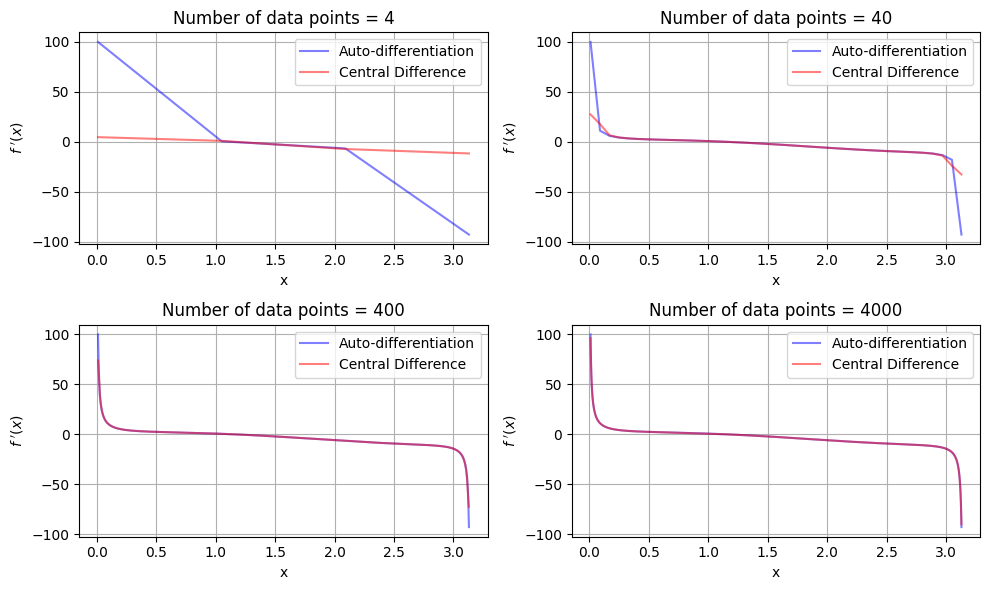

In [11]:
import matplotlib.pyplot as plt

N_data = [4, 40, 400, 4000]

plt.figure(figsize=(10, 6))
for i in range(4):

    data = np.linspace(0.01, 3.13, N_data[i]) # generate data inside defined region, avoid x = 0 and x = pi
    y_auto = auto_diff(data) # autodifferentiate
    y_fd = fd(data) # finite difference

    plt.subplot(2, 2, i+1)
    plt.title(f'Number of data points = {N_data[i]}')
    plt.plot(data, y_auto, color = 'blue', label = 'Auto-differentiation', alpha = 0.5)
    plt.plot(data, y_fd, color = 'red', label = 'Central Difference', alpha = 0.5)
    plt.xlabel('x')
    plt.ylabel('$f~\'(x)$')
    plt.tight_layout()
    plt.grid()
    plt.legend()

Autodifferentiation gives the analytical values for the derivatives, whereas finite difference approximates them based on the rise over run between neighboring data points. Therefore, finite difference suffers when there are not enough data points, which is especially apparent when there are only 4 data points. Additionally, finite difference performs poorly when the slopes are very large, such as at the asymptotes at `x = 0` and `x=pi`.